In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Example dataset
diamonds = sns.load_dataset("diamonds")
print(diamonds.shape)
diamonds.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamond_prices = diamonds["price"]
diamond_prices.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [4]:
mean_price = diamond_prices.mean()
median_price = diamond_prices.median()
std = diamond_prices.std()

print(mean_price); print(median_price); print(std)

3932.799721913237
2401.0
3989.439738146379


In [6]:
skewness = (3 * (mean_price - median_price)) / std

print(
   f"The Pierson's second skewness score of diamond prices distribution is {skewness:.5f}"
)

The Pierson's second skewness score of diamond prices distribution is 1.15189


In [9]:
# Pandas version
diamond_prices.skew()

# SciPy version
from scipy.stats import skew
skew(diamond_prices)

np.float64(1.6183502776053016)

In [11]:
from scipy.stats import kurtosis
kurtosis(diamond_prices)

np.float64(2.177382669056634)

In [12]:
diamond_prices.kurt()

np.float64(2.17769575924869)

In [13]:
# Select numeric features and calculate kurtosis
diamonds.select_dtypes(include="number").kurtosis()

carat     1.256635
depth     5.739415
table     2.801857
price     2.177696
x        -0.618161
y        91.214557
z        47.086619
dtype: float64

In [14]:
def moment_based_kurtosis(distribution):
   n = len(distribution)
   mean = np.mean(distribution)
   std = np.std(distribution)

   kurtosis = (1 / n) * sum(((distribution - mean) / std) ** 4) - 3

   return kurtosis

moment_based_kurtosis(diamond_prices)


2.177382669056634

Text(0.5, 0, 'Price ($)')

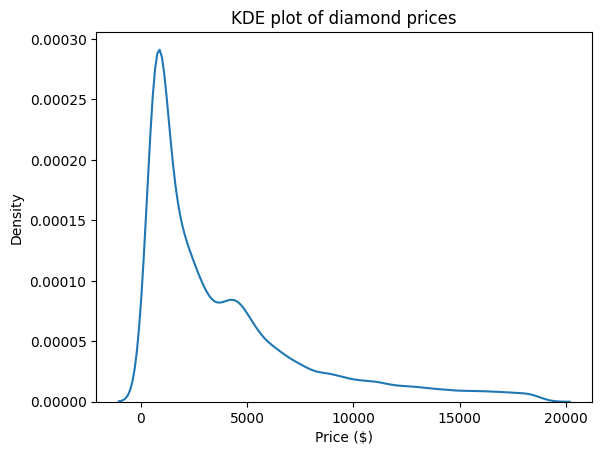

In [15]:
import matplotlib.pyplot as plt

sns.kdeplot(diamond_prices)

plt.title("KDE plot of diamond prices")
plt.xlabel("Price ($)")

Text(0.5, 1.0, 'A histogram of the carat of diamonds')

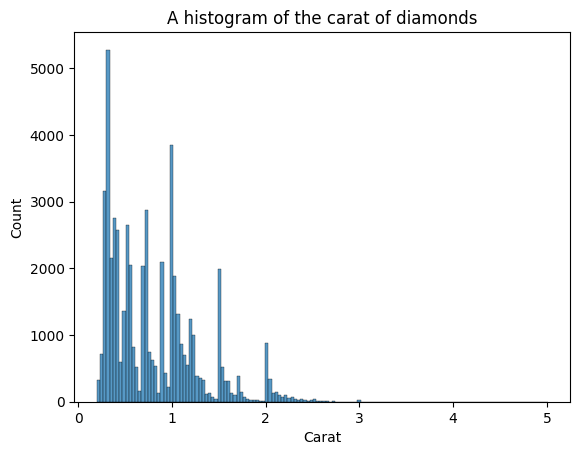

In [16]:
sns.histplot(diamonds["carat"])

plt.xlabel("Carat")
plt.title("A histogram of the carat of diamonds")

Text(0.5, 1.0, 'A histogram of the carat of diamonds')

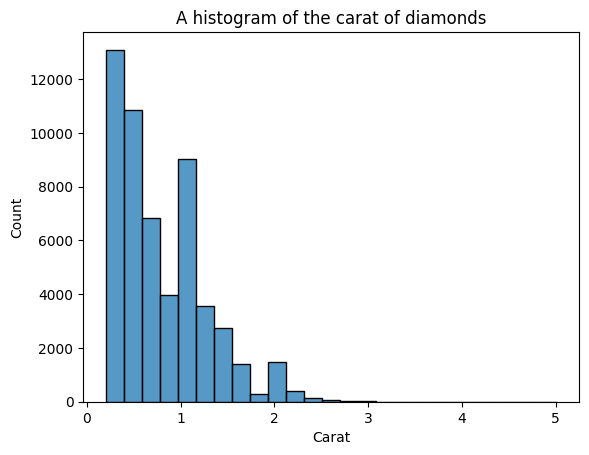

In [17]:
sns.histplot(diamonds["carat"], bins=25)

plt.xlabel("Carat")
plt.title("A histogram of the carat of diamonds")

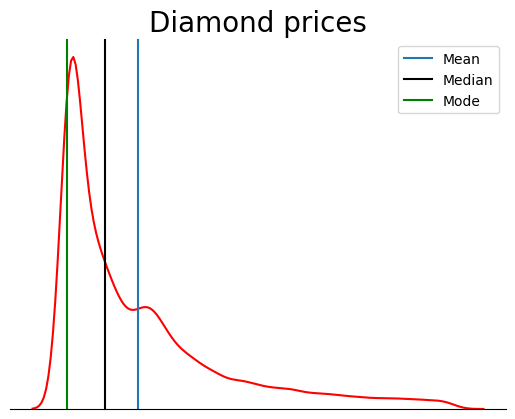

In [18]:
sns.kdeplot(diamond_prices, color="red")

sns.despine(top=True, right=True, left=True)
plt.xticks([])
plt.yticks([])
plt.ylabel("")
plt.xlabel("")
plt.title("Diamond prices", fontdict=dict(fontsize=20))

# Find the mean, median, mode
mean_price = diamonds["price"].mean()
median_price = diamonds["price"].median()
mode_price = diamonds["price"].mode().squeeze()

# Add vertical lines at the position of mean, median, mode
plt.axvline(mean_price, label="Mean")
plt.axvline(median_price, color="black", label="Median")
plt.axvline(mode_price, color="green", label="Mode")

plt.legend();